101
125
30
256


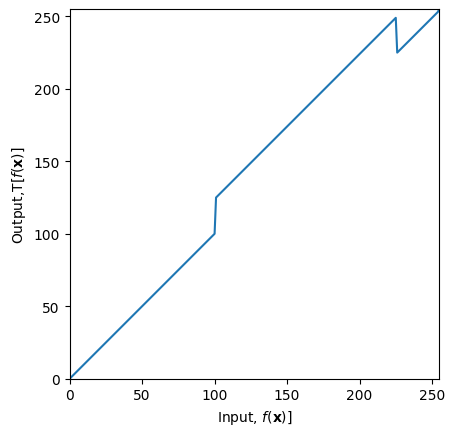

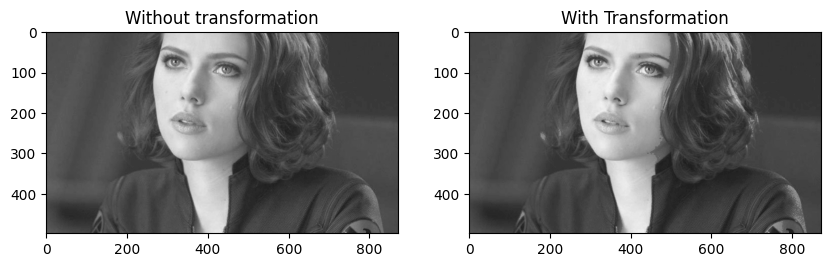

In [63]:
# Question 1
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
t1 = np.linspace(0,100,101).astype('uint8')
print (len(t1))
t2 = np.linspace(125,249,125).astype('uint8')
print (len(t2))
t3 = np.linspace(225,255,30).astype('uint8')
print(len(t3))
transform = np.concatenate((t1,t2),axis = 0).astype('uint8')
transform = np.concatenate ((transform,t3),axis = 0).astype('uint8')
print (len(transform))
fig,ax = plt.subplots()
ax.plot (transform)
ax.set_xlabel (r'Input, $f(\mathbf{x})]$')
ax.set_ylabel ('Output,$\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim (0,255)
ax.set_ylim (0,255)
ax.set_aspect ('equal')
plt.show ()
im = cv.imread ('/examples/natasha grayscale.png',cv.IMREAD_GRAYSCALE)
transform_im = cv.LUT (im,transform)
fig ,ax = plt.subplots (1,2, figsize= (10,10))
ax[0].imshow(im, cmap="gray")
ax[0].set_title("Without transformation")
ax[1].imshow(transform_im, cmap="gray")
ax[1].set_title("With Transformation")
plt.show()

To get a Visually pleasing Output we can use a = 80


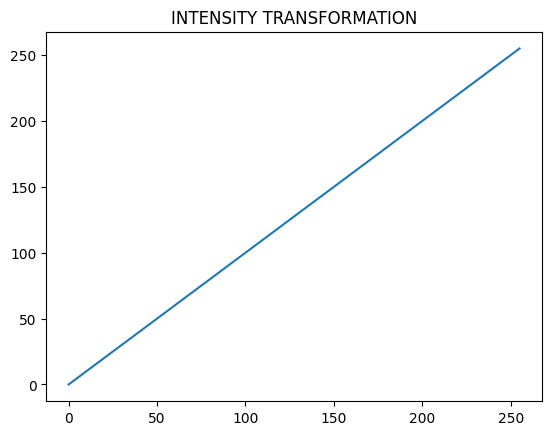

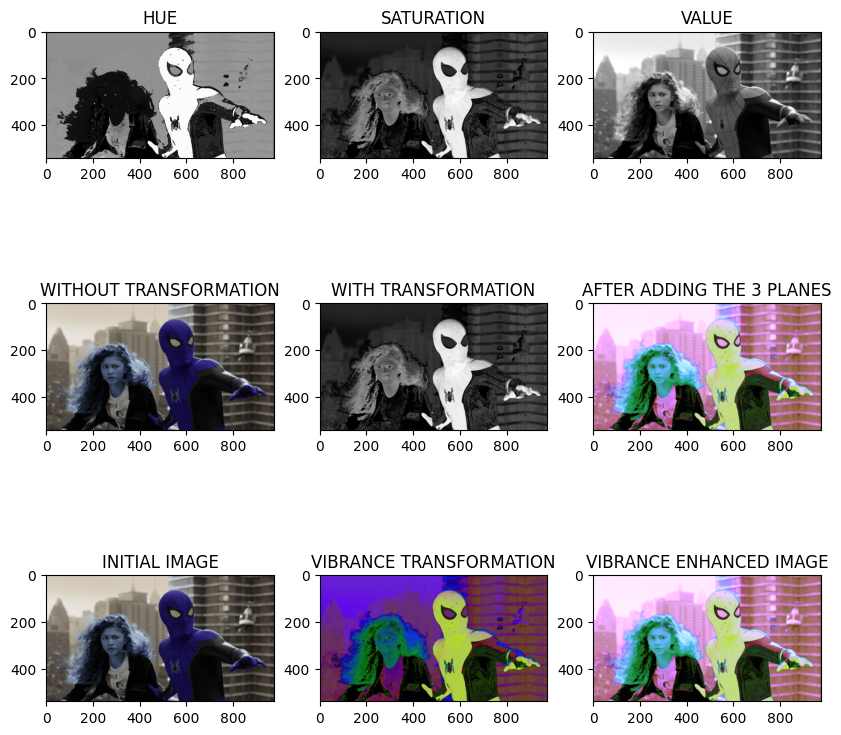

In [52]:
# Question 2 
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
im  = cv.imread ('/examples/spiderman.png',cv.IMREAD_COLOR)
im1 = cv.cvtColor(im,cv.COLOR_BGR2HSV)
h_im,s_im,v_im = cv.split(im1)
assert im is not None
x= np.arange(0,256).astype('uint8')
a = 80
#part (c)
## Adjusting the 'a' value to get a clear output The most accurate image i got when running this code repetedly is 80.
print('To get a Visually pleasing Output we can use a =',a)
sigma = 70
y = np.minimum(((x)+(a*(np.exp(-(x-128)**2/(2*sigma**2))))/128), 255).astype('uint8')
trasnformation = cv.LUT(s_im,y)
plt.title('INTENSITY TRANSFORMATION')
plt.plot(y)
plt.show()
newHSV = cv.merge([h_im,trasnformation,v_im])
result =  cv.cvtColor(newHSV,  cv.COLOR_HSV2BGR)
addition_of_3_planes = cv.add(newHSV, im)
trasnformation = cv.LUT(s_im,y)
fig ,ax = plt.subplots (3,3, figsize= (10,10))
#part (a)
## Splitting the image into 3 planes here we use the inbuilt split command inorder to split the 3 planes
ax[0,0].imshow(h_im,cmap = 'gray')
ax[0,0].set_title('HUE')
ax[0,1].imshow(s_im,cmap = 'gray')
ax[0,1].set_title('SATURATION')
ax[0,2].imshow(v_im,cmap = 'gray')
ax[0,2].set_title('VALUE')
ax[1,0].imshow(im, cmap="gray")
# part (b)
##The given gaussian transformation is plotted below using numpy and then the transform is applied to the image using the LUT function in CV2
ax[1,0].set_title("WITHOUT TRANSFORMATION")
ax[1,1].imshow(trasnformation, cmap="gray")
ax[1,1].set_title("WITH TRANSFORMATION")
#part (d)
## the 3 planes are added using the merge functions and the result is added with the image.
ax[1,2].imshow(addition_of_3_planes, cmap="gray")
ax[1,2].set_title("AFTER ADDING THE 3 PLANES (HSV NEW)")
#part(e)
## We can see the difference when the 3 planes are merged and when they are addd to the orignal image the difference between vibance and vibrance enhanced image can be clearly seen in this question.
ax[2,0].imshow(im, cmap="gray")
ax[2,0].set_title('INITIAL IMAGE')
ax[2,1].imshow(newHSV, cmap="gray")
ax[2,1].set_title('VIBRANCE TRANSFORMATION')
ax[2,2].imshow(addition_of_3_planes, cmap="gray")
ax[2,2].set_title('VIBRANCE ENHANCED IMAGE')
plt.show()




The Gamma value is = 0.4


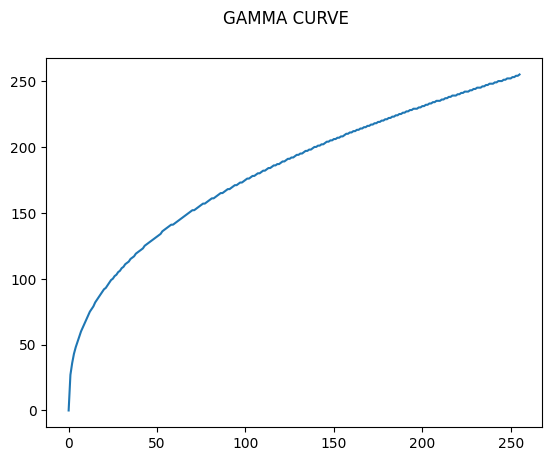

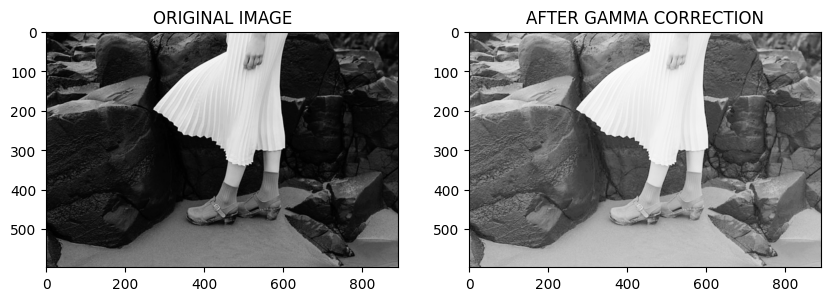

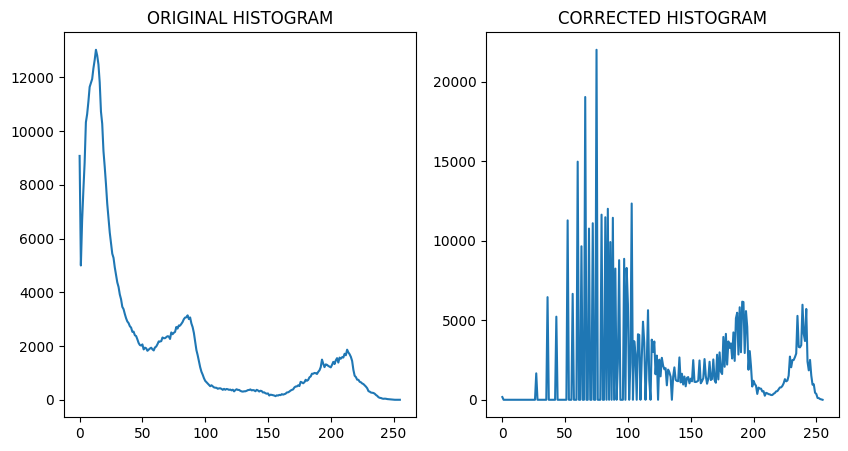

In [85]:
# Question 03
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
im = cv.imread ('/examples/highlights_and_shadows.png', cv.IMREAD_COLOR)
assert im is not None
# CONVERTING THE IMAGE TO LAB Planes
im1 = cv.cvtColor(im, cv.COLOR_BGR2LAB)
L_im,A_im,B_im = cv.split(im1) 
gamma = 0.4
print('The Gamma value is =',gamma)
t = np.array([(i/255.)**gamma*255 for i in range (256)], np.uint8)
## Part (a) applying the gamma corection
g = t[L_im]
plt.suptitle("GAMMA CURVE")
plt.plot(t)
plt.show()
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(L_im, cmap="gray")
ax[0].set_title("ORIGINAL IMAGE")
ax[1].imshow(g,cmap="gray")
ax[1].set_title("AFTER GAMMA CORRECTION")
plt.show()
## Part (b) showing the histograms or of original and corrected images using the cv2 inbuilt function calcHist
plt.figure(figsize = [10, 5])
plt.subplot(1, 2, 1)
plt.gca().set_title('ORIGINAL HISTOGRAM')
original_histogram = cv.calcHist([im],[0],None,[256],[0,256]) ## hist = cv.calcHist(images, channels, mask, histSize, range)
plt.plot(original_histogram)
plt.subplot(1, 2, 2)
plt.gca().set_title('CORRECTED HISTOGRAM')
corrected_histogram= cv.calcHist([g],[0],None,[256],[0,256])
plt.plot(corrected_histogram)
plt.show()


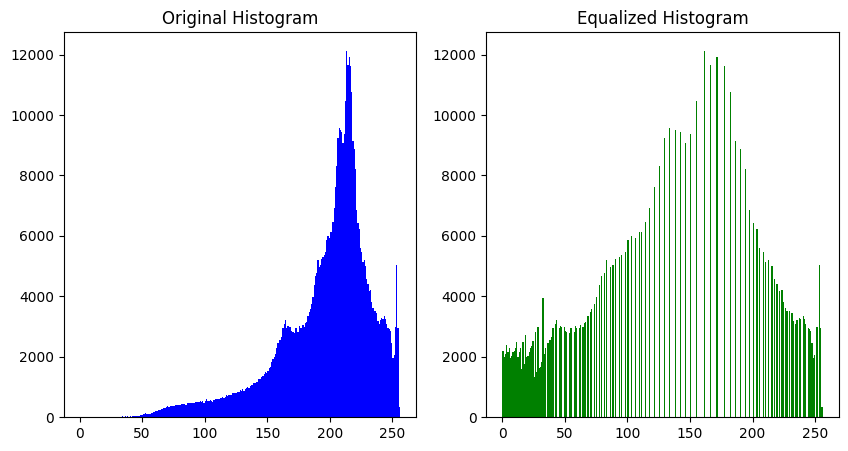

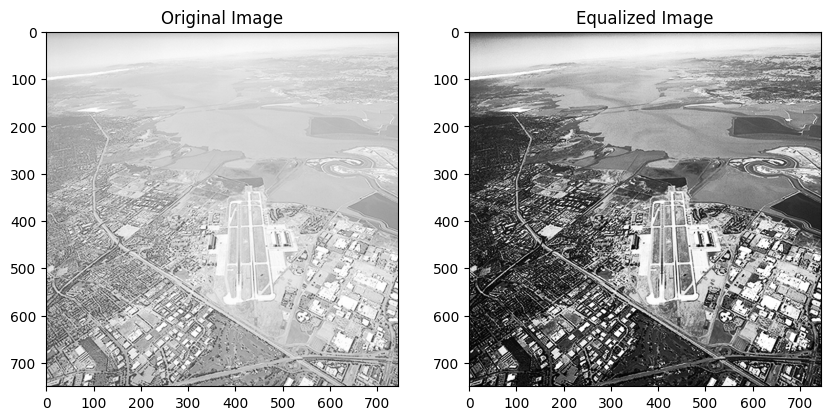

In [97]:
# Manually Calculating The Histogram equalization Function
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def my_function(img):
    gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    hist, bins = np.histogram(gray_img.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf.max()
    lut = np.interp(np.arange(256), bins[:-1], cdf_normalized * 255)
    equalized_img = cv.LUT(gray_img, lut)
    hist_equalized, bins_equalized = np.histogram(equalized_img.flatten(), 256, [0, 256])
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.hist(gray_img.flatten(), 256, [0, 256], color='b')
    plt.title('Original Histogram')
    plt.subplot(1,2,2)
    plt.hist(equalized_img.flatten(), 256, [0, 256], color='g')
    plt.title('Equalized Histogram')
    plt.show()

    return equalized_img

img = cv.imread('/examples/washed_out_arial.png')
equalized_img = my_function(img)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.show()
## In the above code initially it calculates the normal histogram of the original image
##Then the CDF is calculated using cumsum() function and then the histogram is normlaized between 0 and 1
## Then A lookuptable function is used to map the pixels to their equalized values.
## The values arent reduced as expected

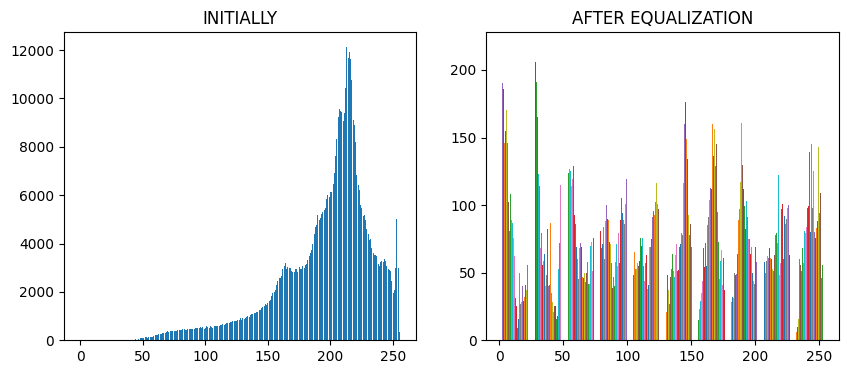

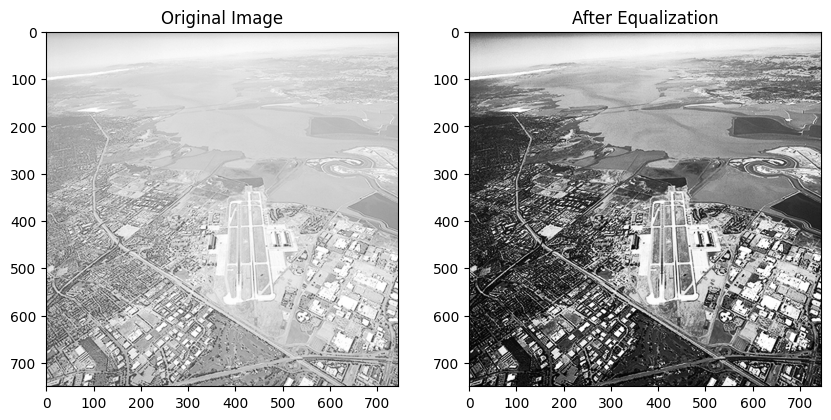

In [15]:
# Question 04 using the inbuilt equalizeHist() Function
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
im = cv.imread('/examples/washed_out_arial.png', cv.IMREAD_GRAYSCALE)
plt.figure(figsize = [10, 4])
plt.subplot(1, 2, 1)
plt.gca().set_title('INITIALLY')
f = np.zeros(256)
f = [np.sum(im==i) for i in range (256)]
plt.bar(range(256), f)
plt.subplot(1, 2, 2)
plt.gca().set_title('AFTER EQUALIZATION')
im2= cv.equalizeHist(im)
plt.hist(im2)
plt.show()
fig, ax= plt.subplots(1,2, figsize=(10,20))
ax[0].imshow(im, cmap="gray")
ax[0].set_title('Original Image')
ax[1].imshow(im2, cmap="gray")
ax[1].set_title('After Equalization')
plt.show()
# There seem to be no difference in the outcome eventhough there is a huge reduction in the hist values in this method therefore ,
# we can use either methods equalize histogram

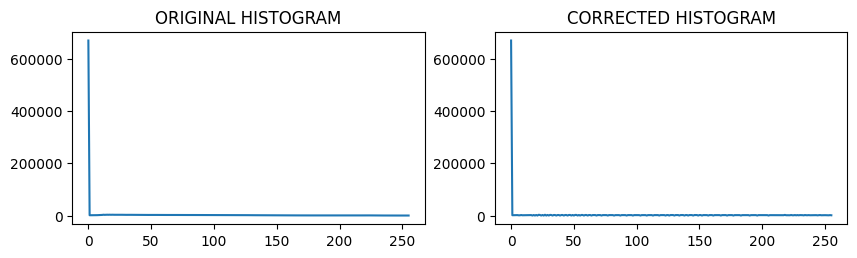

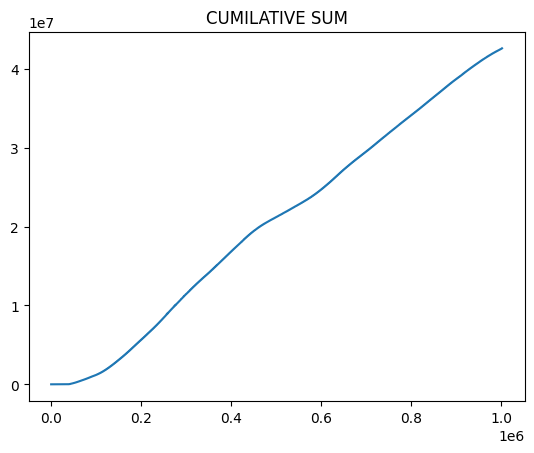

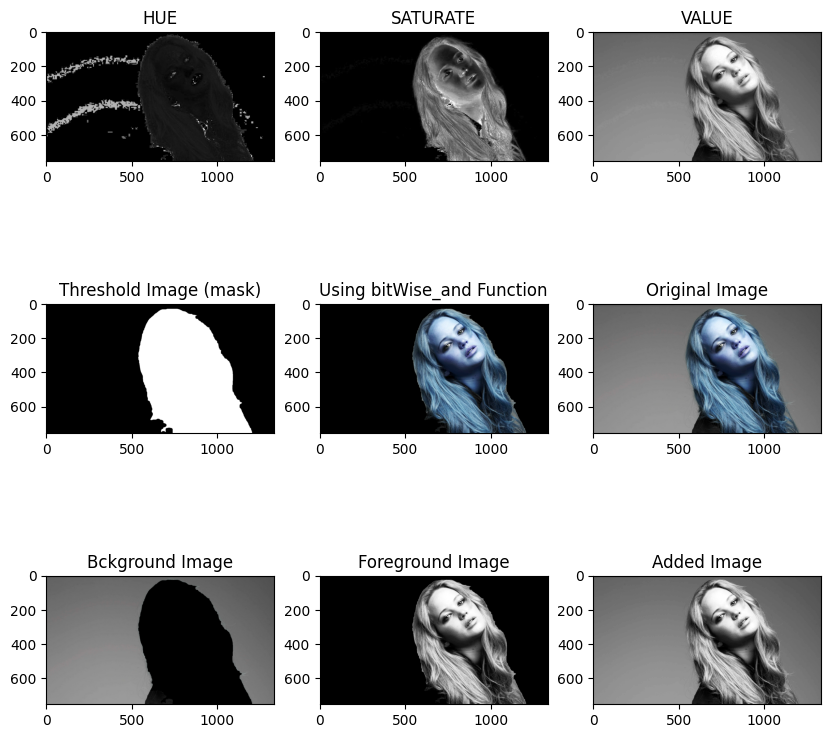

In [120]:
# Question 05
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
im  = cv.imread ('/examples/jeniffer.png',cv.IMREAD_COLOR)
im1 = cv.cvtColor(im,cv.COLOR_BGR2HSV)
#part (a)
##Splitting into HUE SATURATION and VALUE Using the split functio in cv2
H_im,S_im,V_im = cv.split(im1)
#part (b)
##the pixls between 20 to 245 are set to 0 and used the getStructuringElemnt function to create a element of 20*20
##Then the edges were smoothned by the morph function
##
threshold = cv.inRange(S_im, 20, 245)
el = cv.getStructuringElement(cv.MORPH_ELLIPSE, (20,20))
mask = cv.morphologyEx(threshold, cv.MORPH_CLOSE, el)
# part (c)
## Using bitWise function in cv2 to obtain the foreground
res1 = cv.bitwise_and(im, im, mask=mask)

#part (e)
## Histogram equalizing the fore ground
plt.figure(figsize = [10, 2.5])
plt.subplot(1, 2, 1)
plt.gca().set_title('ORIGINAL HISTOGRAM')
fg_h = cv.calcHist([res1],[0],None,[256],[0,256])
plt.plot(fg_h)
plt.subplot(1, 2, 2)
plt.gca().set_title('CORRECTED HISTOGRAM')
res2 = cv.cvtColor(res1, cv.COLOR_BGR2GRAY)
equalized_histogram_1 = cv.equalizeHist(res2)
eh1 = cv.calcHist([equalized_histogram_1], [0], None, [256], [0,256])
plt.plot(eh1)
plt.show()

# part (f)
plt.gca().set_title ('CUMILATIVE SUM')
cumulative_sum = np.cumsum(equalized_histogram_1) 
plt.plot(cumulative_sum)
plt.show()

# part (f)
mask1 = 255-mask
im_bg1 = cv.bitwise_and(im,im,mask= mask1)
im_bg2 = cv.cvtColor(im_bg1,cv.COLOR_BGR2GRAY)
im_add = cv.add(im_bg2,equalized_histogram_1)

fig,ax = plt.subplots(3,3,figsize = (10,10))
ax[0,0].set_title('HUE')
ax[0,0].imshow(H_im,cmap = 'gray')
ax[0,1].set_title('SATURATE')
ax[0,1].imshow(S_im,cmap = 'gray')
ax[0,2].set_title('VALUE')
ax[0,2].imshow(V_im,cmap = 'gray')
ax[1,0].set_title('Threshold Image (mask)')
ax[1,0].imshow(mask,cmap = 'gray')
ax[1,1].set_title('Using bitWise_and Function')
ax[1,1].imshow(result,cmap = 'gray')
ax[1,2].set_title('Original Image')
ax[1,2].imshow(im,cmap = 'gray')
ax[2,0].set_title('Bckground Image')
ax[2,0].imshow(im_bg1,cmap = 'gray')
ax[2,1].set_title('Foreground Image')
ax[2,1].imshow(equalized_histogram_1,cmap = 'gray')
ax[2,2].set_title('Added Image')
ax[2,2].imshow(im_add,cmap = 'gray')
plt.show()